# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts. What do these clusters represent? *Note: There is no 100% right answer

----

## Imports and Data


In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
import warnings
warnings.filterwarnings("ignore")

In [214]:
df = pd.read_csv('CIA_Country_Facts.csv')

## Exploratory Data Analysis

**TASK: Explore the rows and columns of the data as well as the data types of the columns.**

In [215]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [217]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


In [218]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

# Exploratory Data Analysis

Let's create some visualizations. Please feel free to expand on these with your own analysis and charts!

<Axes: xlabel='Population', ylabel='Count'>

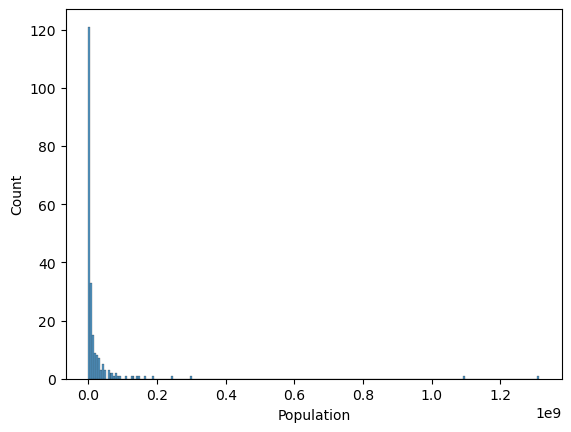

In [219]:
sns.histplot(data=df,x='Population')

(0.0, 50000000.0)

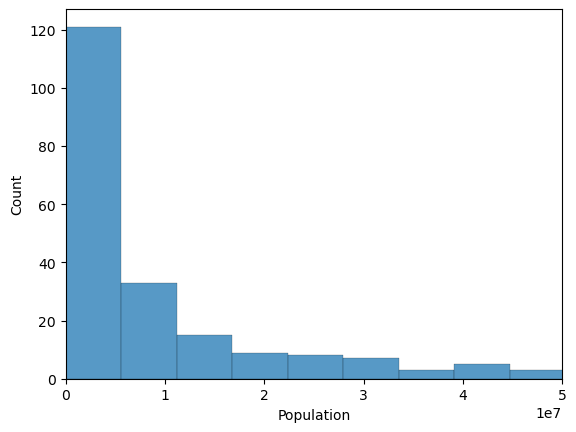

In [220]:
sns.histplot(data=df,x='Population')
plt.xlim(0,50000000)

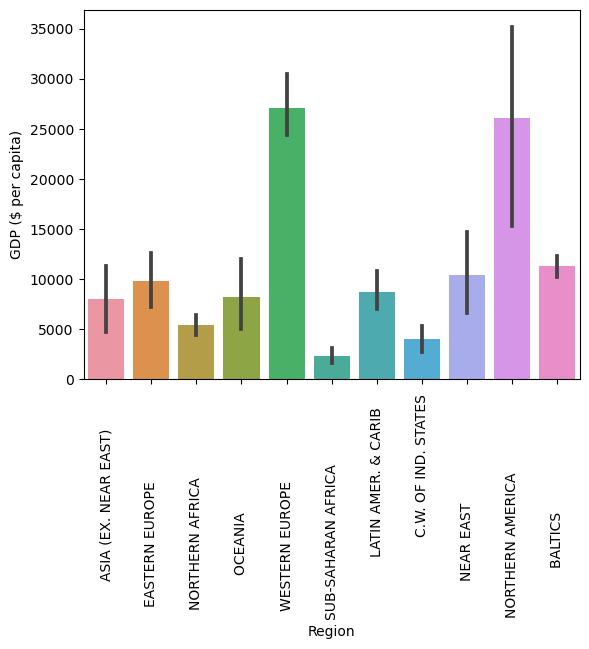

In [221]:
sns.barplot(data=df,x='Region',y='GDP ($ per capita)')
plt.xticks(rotation=90);

<Axes: xlabel='GDP ($ per capita)', ylabel='Phones (per 1000)'>

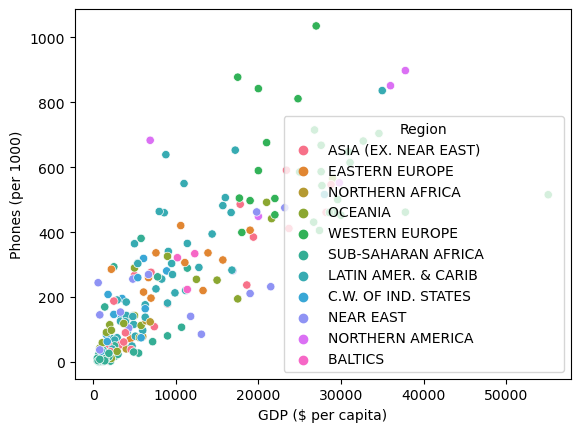

In [222]:
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)',hue='Region')

<Axes: xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

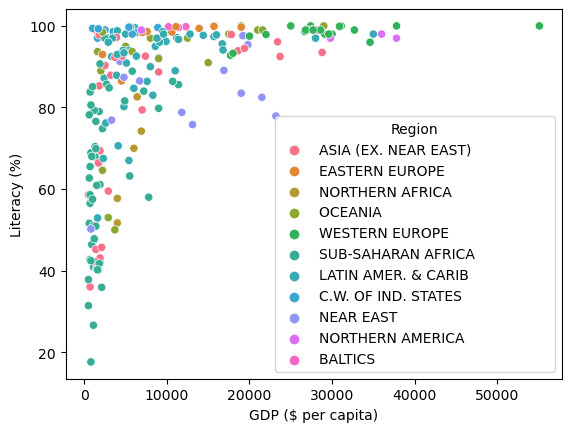

In [223]:
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue='Region')

<Axes: >

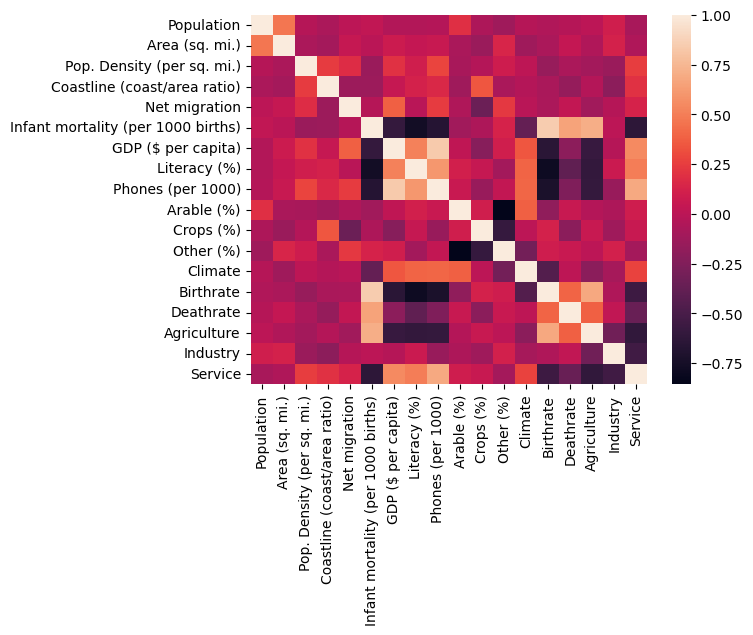

In [224]:
sns.heatmap(df.corr(numeric_only=True))

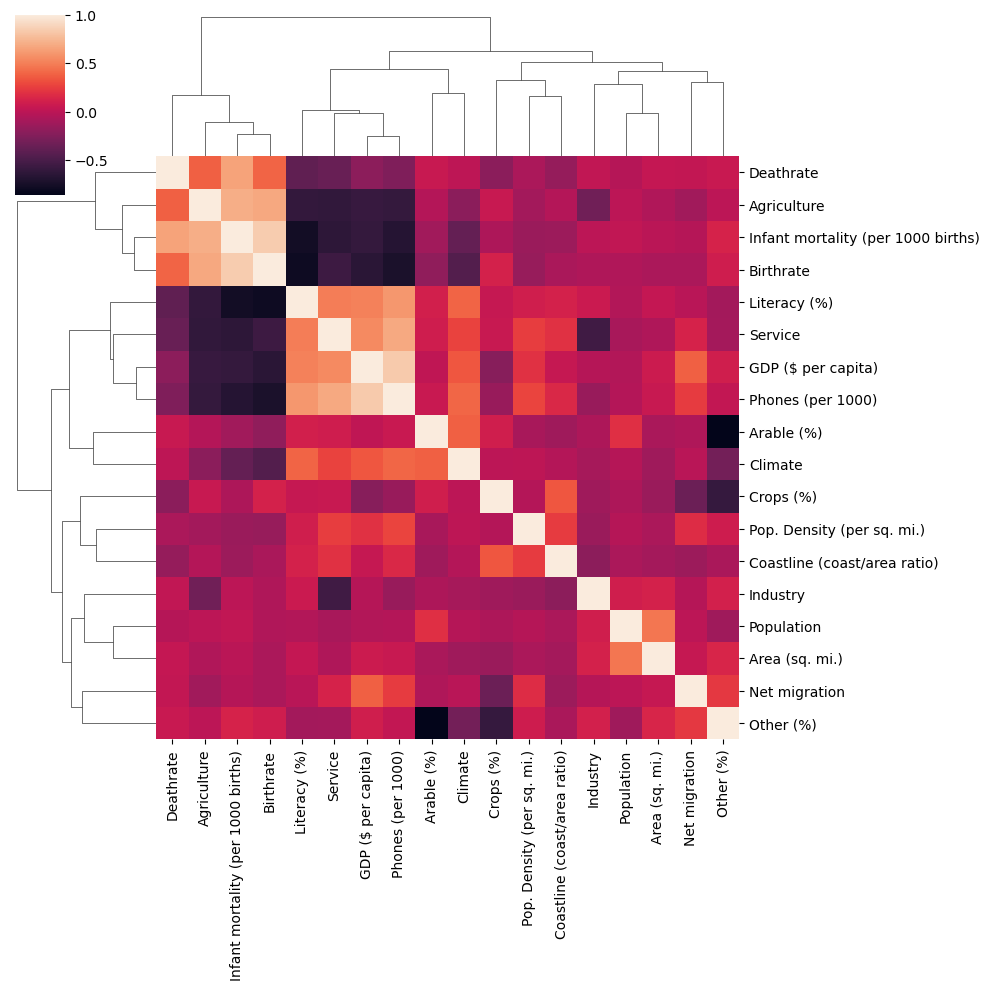

In [225]:
sns.clustermap(df.corr(numeric_only=True))

-----

## Data Preparation and Model Discovery

Let's now prepare our data for Kmeans Clustering!

### Missing Data



In [226]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [227]:
df[df['Agriculture'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.00,5.13,17500.0,NaN,877.7,0.00,0.00,100.00,NaN,10.74,9.31,NaN,NaN,NaN
80,Greenland,NORTHERN AMERICA,56361,2166086,0.0,2.04,-8.37,15.82,20000.0,NaN,448.9,0.00,0.00,100.00,1.0,15.93,7.84,NaN,NaN,NaN
83,Guam,OCEANIA,171019,541,316.1,23.20,0.00,6.94,21000.0,99.0,492.0,9.09,16.36,74.55,2.0,18.79,4.48,NaN,NaN,NaN
134,Mayotte,SUB-SAHARAN AFRICA,201234,374,538.1,49.52,6.78,62.40,2600.0,NaN,49.7,NaN,NaN,NaN,2.0,40.95,7.70,NaN,NaN,NaN
140,Montserrat,LATIN AMER. & CARIB,9439,102,92.5,39.22,0.00,7.35,3400.0,97.0,NaN,20.00,0.00,80.00,2.0,17.59,7.10,NaN,NaN,NaN
144,Nauru,OCEANIA,13287,21,632.7,142.86,0.00,9.95,5000.0,NaN,143.0,0.00,0.00,100.00,2.0,24.76,6.70,NaN,NaN,NaN
153,N. Mariana Islands,OCEANIA,82459,477,172.9,310.69,9.61,7.11,12500.0,97.0,254.7,13.04,4.35,82.61,2.0,19.43,2.29,NaN,NaN,NaN
171,Saint Helena,SUB-SAHARAN AFRICA,7502,413,18.2,14.53,0.00,19.00,2500.0,97.0,293.3,12.90,0.00,87.10,NaN,12.13,6.53,NaN,NaN,NaN


In [228]:
df[df['Agriculture'].isnull()]=df[df['Agriculture'].isnull()].fillna(0)

In [229]:
df['Agriculture'].isnull().sum()

0

In [230]:
df['Climate']=df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [231]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [232]:
df['Literacy (%)']=df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [233]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [255]:
df = df.dropna()

## Data Feature Preparation

In [235]:
X=df.drop('Country',axis=1)

In [236]:
X

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,NORTHERN AFRICA,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,0.0,0.02,0.00,99.98,1.0,0.00,0.00,0.000,0.000,0.400
224,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [256]:
X = pd.get_dummies(X)

In [258]:
X

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Target
0,31056997,647500,48,0,23,163,700,36,3,12,...,0,0,0,0,0,0,0,0,0,2
1,3581655,28748,124,1,-4,21,4500,86,71,21,...,0,1,0,0,0,0,0,0,0,1
2,32930091,2381740,13,0,0,31,6000,70,78,3,...,0,0,0,0,1,0,0,0,0,0
3,57794,199,290,58,-20,9,8000,97,259,10,...,0,0,0,0,0,0,1,0,0,0
4,71201,468,152,0,6,4,19000,100,497,2,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419,0,2,19,800,79,145,16,...,0,0,0,1,0,0,0,0,0,0
223,273008,266000,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
224,21456188,527970,40,0,0,61,800,50,37,2,...,0,0,0,1,0,0,0,0,0,2
225,11502010,752614,15,0,0,88,800,80,8,7,...,0,0,0,0,0,0,0,1,0,2


### Scaling

In [259]:
from sklearn.preprocessing import StandardScaler

In [260]:
scale=StandardScaler()

In [261]:
X_scaled=scale.fit_transform(X)

In [262]:
X_scaled

array([[ 0.0133285 ,  0.01855412, -0.20273096, ..., -0.54772256,
        -0.36514837,  1.49942436],
       [-0.21730118, -0.32370888, -0.14389506, ..., -0.54772256,
        -0.36514837,  0.29879833],
       [ 0.02905136,  0.97784988, -0.22982644, ..., -0.54772256,
        -0.36514837, -0.9018277 ],
       ...,
       [-0.06726127, -0.04756396, -0.20892421, ..., -0.54772256,
        -0.36514837,  1.49942436],
       [-0.15081724,  0.07669798, -0.22827813, ...,  1.82574186,
        -0.36514837,  1.49942436],
       [-0.14464933, -0.12356132, -0.21589162, ...,  1.82574186,
        -0.36514837,  1.49942436]])

### Creating and Fitting Kmeans Model

In [263]:
from sklearn.cluster import KMeans
kmeans=KMeans()

In [264]:
ssd=[]
for i in range(2,31):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

In [265]:
ssd

[4993.7625372633565,
 4466.328529441812,
 4152.003369733919,
 3893.940781065712,
 3603.6573408345794,
 3383.0534927791596,
 3113.322941973039,
 2810.956626513085,
 2655.3948655329896,
 2390.4958606784116,
 2117.0350202368436,
 2039.2731080230462,
 1885.0669973065847,
 1688.6113718849708,
 1618.8146078042498,
 1515.1798771140864,
 1461.156987129886,
 1445.3926980483016,
 1333.6934259035647,
 1296.987534953253,
 1280.2928200128151,
 1226.98051632757,
 1177.4445374191455,
 1151.4070719692736,
 1126.614919056349,
 1075.280534192526,
 1061.5503824536509,
 1028.3722118447295,
 981.3372680367698]

(1.0, 31.0)

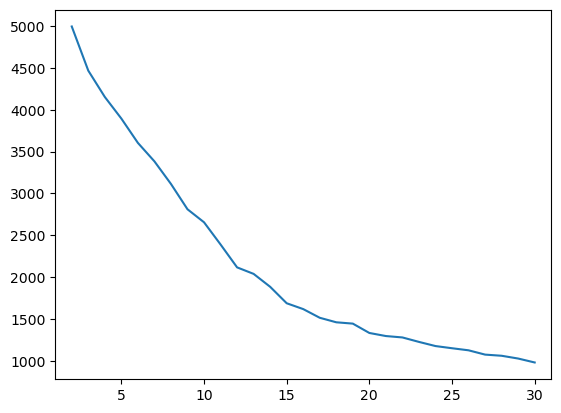

In [266]:
plt.plot(range(2,31),ssd)
plt.xlim(1,31)

<Axes: >

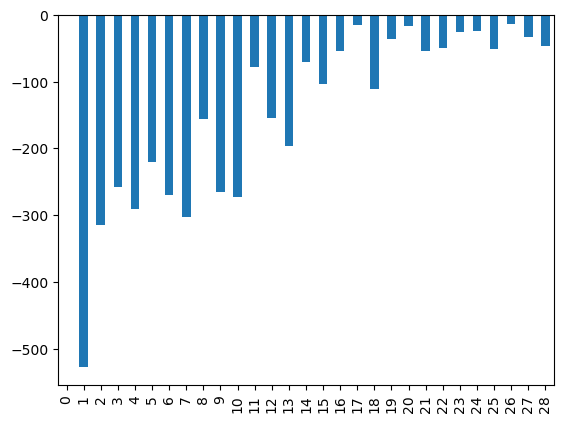

In [267]:
pd.Series(ssd).diff().plot(kind='bar')

-----

# Model Interpretation


**What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices. As this is unsupervised learning, there is no 100% correct answer here.**

-----


#### Example Interpretation: Choosing K=3

**One could say that there is a significant drop off in SSD difference at K=3 (although we can see it continues to drop off past this). What would an analysis look like for K=3? Let's explore which features are important in the decision of 3 clusters!**

In [268]:
k_means=KMeans(n_clusters=3)
k_means.fit(X_scaled)

KMeans(n_clusters=3)

In [269]:
X['Target'] = k_means.labels_

In [270]:
X

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Target
0,31056997,647500,48,0,23,163,700,36,3,12,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124,1,-4,21,4500,86,71,21,...,0,1,0,0,0,0,0,0,0,2
2,32930091,2381740,13,0,0,31,6000,70,78,3,...,0,0,0,0,1,0,0,0,0,1
3,57794,199,290,58,-20,9,8000,97,259,10,...,0,0,0,0,0,0,1,0,0,1
4,71201,468,152,0,6,4,19000,100,497,2,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419,0,2,19,800,79,145,16,...,0,0,0,1,0,0,0,0,0,1
223,273008,266000,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
224,21456188,527970,40,0,0,61,800,50,37,2,...,0,0,0,1,0,0,0,0,0,0
225,11502010,752614,15,0,0,88,800,80,8,7,...,0,0,0,0,0,0,0,1,0,0


In [284]:
X.corr(numeric_only=True)['Target'].sort_values()

Birthrate                                    -0.830870
Infant mortality (per 1000 births)           -0.779722
Region_SUB-SAHARAN AFRICA                    -0.693598
Deathrate                                    -0.419655
Other (%)                                    -0.115207
Crops (%)                                    -0.072017
Region_ASIA (EX. NEAR EAST)                  -0.017115
Area (sq. mi.)                               -0.002016
Population                                   -0.001123
Region_NORTHERN AFRICA                        0.001067
Region_NEAR EAST                              0.001723
Region_OCEANIA                                0.002014
Region_LATIN AMER. & CARIB                    0.019084
Region_C.W. OF IND. STATES                    0.057882
Coastline (coast/area ratio)                  0.080934
Region_NORTHERN AMERICA                       0.129782
Net migration                                 0.133803
Region_BALTICS                                0.166279
Pop. Densi


------------
-------------


## Geographical Model Interpretation

The best way to interpret this model is through visualizing the clusters of countries on a map!

**TASK: Create cluster labels for a chosen K value. Based on the solutions, we believe either K=3 or K=15 are reasonable choices. But feel free to choose differently and explore.**

In [272]:
k_means.labels_

array([0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 0,
       2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       2, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0,
       2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0,
       1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0])

In [277]:
X.groupby('Target').agg(['mean', 'std', 'median'])

Population                          Area (sq. mi.)                \
                mean           std     median           mean           std   
Target                                                                       
0       2.093084e+07  3.434551e+07  9817211.5  483913.607143  5.529064e+05   
1       3.835315e+07  1.643183e+08  3039300.5  751555.372727  2.182069e+06   
2       2.039470e+07  4.539804e+07  5439448.0  471169.600000  1.837470e+06   

                 Pop. Density (per sq. mi.)                      \
          median                       mean          std median   
Target                                                            
0       256762.0                  98.571429   162.429717   44.0   
1        67655.0                 168.900000   408.519636   67.5   
2        51129.0                 806.963636  2475.185784  124.0   

       Coastline (coast/area ratio)  ...  \
                               mean  ...   
Target                               ...   
0                          2.071429  ...   
1                         29.781818  ...   
2                         18.309091  ...   

       Region_NORTHERN AMERICA                     \
                                           median   
Target                                              
0                                             0.0   
1                                             0.0   
2                                             0.0   

       Region_OCEANIA                                              \
                                             mean      std median   
Target                                                              
0                                        0.000000  0.00000    0.0   
1                                        0.181818  0.38746    0.0   
2                                        0.000000  0.00000    0.0   

       Region_SUB-SAHARAN AFRICA                                    \
                                             mean       std median   
Target                                                               
0                                        0.839286  0.370591    1.0   
1                                        0.027273  0.163622    0.0   
2                                        0.018182  0.134840    0.0   

       Region_WESTERN EUROPE                                        
                                             mean       std median  
Target                                                              
0                                        0.000000  0.000000    0.0  
1                                        0.000000  0.000000    0.0  
2                                        0.472727  0.503857    0.0  

[3 rows x 87 columns]

In [278]:
iso_codes = pd.read_csv("country_iso_codes.csv")

In [279]:
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()

In [280]:
df['ISO Code'] = df['Country'].map(iso_mapping)

In [281]:
df['Cluster'] = k_means.labels_

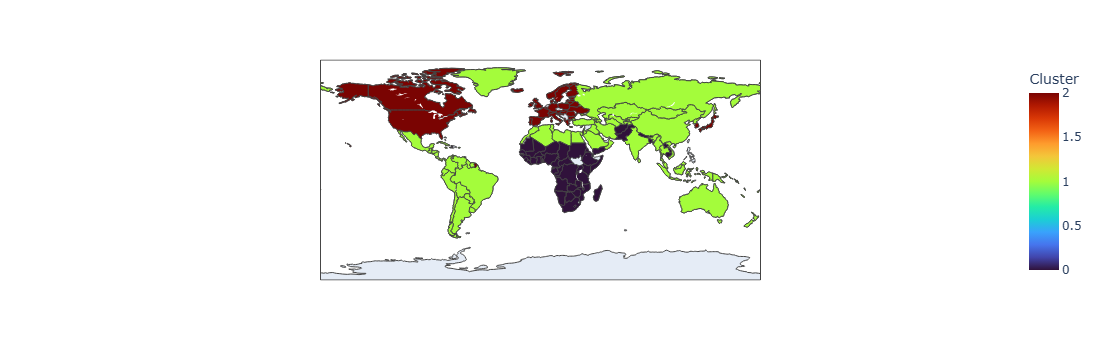

In [282]:
import plotly.express as px

fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster",
                    hover_name="Country",
                    color_continuous_scale='Turbo'
                    )
fig.show()